### 530 HW6- Functions 
Emma Rasmussen 

#### Problem 1- Expanding and Interpolating Functions 
##### Parts a & b

In [42]:
import numpy as np
import time

def TaylorSin(x, N):
    sinval = 0
    for i in range(N):
        term = ((-1)**(i+2))*(x**(2*i + 1)) / np.math.factorial(2*i + 1)
        sinval += term

    return sinval

def RMSE(act, pred):
    rmse = np.sqrt(np.mean((np.subtract(act,pred))**2))

    return rmse

def Interp(x,xvals,yvals):
    # np.random.seed(27)
    i = np.searchsorted(xvals,x)
    if i == 0:
        return yvals[0]
    elif i == len(xvals):
        return yvals[-1]
    x0,x1 = xvals[i-1],xvals[i]
    y0,y1 = yvals[i-1],yvals[i]
    interpval = y0 +(y1 - y0)*(x - x0)/(x1 - x0)

    return interpval

def AccSpeed(N):
    #The following line if we want the same random vector every time
    np.random.seed(27)
    xvals = np.random.uniform(0,2*np.pi,10**6)
    xn = np.linspace(0,2*np.pi, 10**6)
    yvals = np.sin(xn)
    apprxvec = []
    actualvec = []
    apprxveci = []
    actualveci = []

    # for part a
    st = time.time()
    for i in range(len(xvals)):
        apprx = TaylorSin(xvals[i], N)
        act = np.sin(xvals[i])
        apprxvec.append(apprx)
        actualvec.append(act)
    et = time.time()
    tt = et - st 

    # for part b
    sti = time.time()
    for i in range(len(xn)):
        apprx = Interp(xvals[i],xn, yvals)
        act = yvals[i]
        apprxveci.append(apprx)
        actualveci.append(act)
    eti = time.time()
    tti = eti - sti 
    rmse = RMSE(apprxvec, actualvec)
    rmsei = RMSE(apprxveci, actualveci)

    #return rmse, tt

    print(f'The rmse for N={N} was: {rmse}')
    print(f'The time it took for N={N} was: {tt}s')

    print(f'The rmse for interpolation for N={N} was: {rmsei}')
    print(f'The time it took for interpolation for N={N} was: {tti}s')

#Testing for different N
#AccSpeed(5)
#AccSpeed(7)
#AccSpeed(9)

#### Problem 2
##### Part a

In [43]:
from scipy.integrate import quad

#For part a, the blackbox python function
def f(x):
    return np.exp(-np.cos(x))

def g(x):
    if -1 <= x <= 1:
        return f(x)
    else: 
        return 0

i1 = 7.9549265210128452745132196653294
i23 = .87070265620795901020832433774759
val1,_ = quad(f, -np.pi, np.pi, limit=100)
val2,_ = quad(f, -1, 1, limit=100)
val3,_ = quad(g, -np.pi, np.pi, limit=100)
print(f'The difference between i1 and the actual value is:{i1-val1}')
print(f'The difference between i2 and the actual value is:{i23-val2}')
print(f'The difference between i3 and the actual value is:{i23-val3}')

The difference between i1 and the actual value is:-8.881784197001252e-16
The difference between i2 and the actual value is:1.1102230246251565e-16
The difference between i3 and the actual value is:-2.5360991084966145e-10


According to python documentation, this function is using a different series of functions for definite vs indefinite integrals. I will only descirbe the definite since that's what we used. It uses a Clenshaw-Curtis method. First, it computes the Chebyshev moments, then, it makes an integer array with the length of whatever you defined the limit as (I did 100). Then, it makes a subinterval for each moment. Then, it makes a rank 2 array with the moments, which it passes on to an integration by using the moments and subdivided array. 

#### Part b

[]

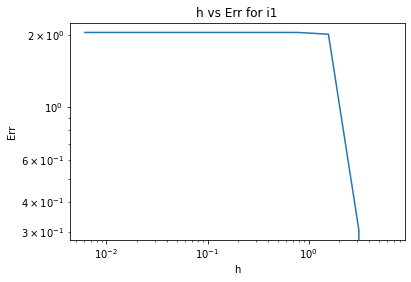

c:\Users\rasmu\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


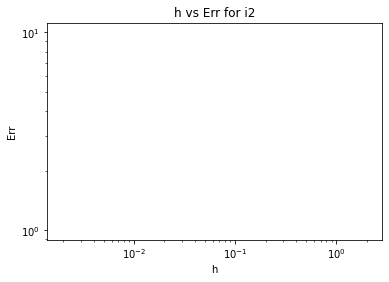

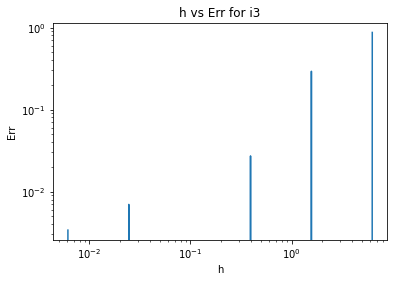

In [44]:
import matplotlib.pyplot as plt

def Trapf(lower, upper, N):
    b = upper
    a = lower 
    h = (b - a)/N
    val = 0 
    for i in range(N + 1):
        if i == 0 or i ==N:
            val += .5*f(a + i*h)
        else:
            val += f(a + i*h)
    final = h*val

    return final,h

def Trapg(lower, upper, N):
    b = upper
    a = lower 
    h = (b - a)/N
    val = 0 
    for i in range(N + 1):
        if i == 0 or i ==N:
            val += .5*g(a + i*h)
        else:
            val += g(a + i*h)
    final = h*val

    return final,h

def Plots(Nvec, Errvec, I):
    plt.figure()
    plt.loglog(Nvec,Errvec)
    plt.title(f'h vs Err for i{I}')
    plt.xlabel('h')
    plt.ylabel('Err')
    return plt.plot()
  
N = [2**i for i in range(11)]

err1vec = []
err2vec = []
err3vec = []
h1vec = []
h2vec = []
h3vec = []

for j in range(len(N)):
    val1, h1 = Trapf(-np.pi, np.pi, N[j])
    val2, h2 = Trapf(-1, 1, N[j])
    val3, h3 = Trapg(-np.pi, np.pi, N[j])
    err1 = i - val1 
    err1vec.append(err1)
    h1vec.append(h1)
    err2 = i23 - val2 
    err2vec.append(err2)
    h2vec.append(h2)
    err3 = i23 - val3 
    err3vec.append(err3)
    h3vec.append(h3)
 
Plots(h1vec, err1vec, 1)
Plots(h2vec, err2vec, 2)
Plots(h3vec, err3vec, 3)

### Problem 3
#### Part a
The optimal abcissas are the points that are the roots of the highest order legendre polynomials. The weights are chosen so that the integral over the polynomials is exact. In other words, you want the weight to be orthogonal to the function. For this integral, we could calculate them like so: 

In [53]:
from scipy.special import roots_legendre

def OptAW(N):

    absc, weight = roots_legendre(N)

    optabsc = np.pi/2*(1 + absc)
    optweight = np.pi/2*(1 + weight)

    print(f'The optimal abscissas are:{optabsc}')
    print(f'The optimal weights are:{optweight}')

OptAW(5)

The optimal abscissas are:[0.14737235 0.72497071 1.57079633 2.41662194 2.9942203 ]
The optimal weights are:[1.94296021 2.32262448 2.4644049  2.32262448 1.94296021]


#### Part b

In [54]:
def fphi(phi):
    return np.sin(phi)**2

def ftheta(theta):
    return np.cos(theta)**2

def Trapphi(N):
    h = 2*np.pi/N
    phivals = np.linspace(0, 2*np.pi, N+1)
    phiint = np.sum(0.5 * h * (fphi(phivals[:-1]) + fphi(phivals[1:])))

    return phiint

def Sphere(Ncos, Nphi):
    rcos, wcos = roots_legendre(Ncos)
    intsum = 0 
    for i in range(Ncos):
        costheta = rcos[i]
        costhetaw = wcos[i]
        sintsum += costhetaw*ftheta(costheta)
    intsum *= Trapphi(Nphi)

    return intsum






def 

Approximation of the spherical integral: 2.0943951023931904
Exact value of the integral: 2.0943951023931953


In [55]:
2*np.pi/3

2.0943951023931953